<a href="https://colab.research.google.com/github/beabritw/ProjetoIntegrador/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image

In [ ]:
def tabela(cor_Hex):
    tabela_cores = {
        "extre_branca": [
            "#ead8c4", "#edd8c5", "#eed7c7", "#f0d6c9", "#f2d6cb", "#f5c4cd", "#e0c8ae",
            "#e1c7ae", "#e5c6b1", "#e6c5b2", "#e9c3b6"
        ],
        "branca": [
            "#eac2ba", "#d2b897", "#d5b699", "#d9b59b", "#dcb39f", "#c4a682", "#cba487",
            "#cfa28b"
        ],
        "morena_clara": [
            "#d1a08f", "#d4a093", "#b4976f", "#b89470", "#bd9174", "#c38f7a", "#c68d82",
            "#a5855e", "#a7835f", "#ac8063"
        ],
        "media": [
            "#baf8066", "#b27e69", "#b67c70", "#a7835f", "#95734e", "#9a7153", "#9d6f55",
            "#a16e5b", "#a36a5f", "#80643d", "#836241"
        ],
        "morena_escura": [
            "#876043", "#8b5f46", "#8d5c4b", "#905c4f", "#6d5533", "#715235", "#745036",
            "#754f38", "#784d3d", "#7b4b41", "#594427"
        ],
        "negra": [
            "#5d412b", "#61402d", "#594427", "#453420", "#463420", "#4e2f2a"
        ]
    }

    # Função para calcular a diferença entre duas cores hexadecimais
    def diferenca_cor(cor1, cor2):
        r1, g1, b1 = int(cor1[1:3], 16), int(cor1[3:5], 16), int(cor1[5:], 16)
        r2, g2, b2 = int(cor2[1:3], 16), int(cor2[3:5], 16), int(cor2[5:], 16)
        return ((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2) ** 0.5

    cor_mais_proxima = None
    menor_diferenca = float('inf')
    tipo_cor = None

    # Itera sobre as cores na tabela e encontra a mais próxima
    for categoria, cores in tabela_cores.items():
        for cor in cores:
            diferenca = diferenca_cor(cor_Hex, cor)
            if diferenca < menor_diferenca:
                cor_mais_proxima = cor
                menor_diferenca = diferenca
                tipo_cor = categoria

    # Se a cor não estiver na tabela, retorna a cor mais próxima e o tipo de cor
    if tipo_cor:
        return tipo_cor
    else:
        return cor_mais_proxima



In [ ]:

# Faz upload da imagem para o Colab
uploaded = files.upload()

# Carrega a imagem
for filename in uploaded.keys():
    image = cv2.imread(filename)

# Converte a imagem para o espaço de cor HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define os intervalos de cor para a pele
lower_skin = np.array([0, 48, 80], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# Cria uma máscara para a cor da pele na imagem HSV
skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

# Aplica a máscara na imagem original
skin_segmented_image = cv2.bitwise_and(image, image, mask=skin_mask)

# Converte a imagem segmentada para escala de cinza
gray_image = cv2.cvtColor(skin_segmented_image, cv2.COLOR_BGR2GRAY)

# Carrega o classificador pré-treinado para detecção de rostos
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detecta rostos na imagem segmentada
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenha um retângulo ao redor de cada rosto detectado na imagem original
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Salva a imagem com os rostos detectados
cv2.imwrite('output_segmented.jpg', image)

# Calcula a média das cores da pele dos rostos detectados
mean_skin_colors = []

for (x, y, w, h) in faces:
    # Extrai a região do rosto da imagem original
    face_roi = image[y:y+h, x:x+w]
    # Calcula a média das cores da região do rosto
    mean_color = cv2.mean(face_roi)[:3]
    #mean_color[:3][::-1]  em rgb
    mean_skin_colors.append(mean_color)

# Cria uma imagem em branco para exibir as cores médias da pele
height = len(mean_skin_colors) * 50
mean_skin_colors_image = np.zeros((height, 200, 3), dtype=np.uint8)

# Preenche a imagem com as cores médias da pele
for i, color in enumerate(mean_skin_colors):
    mean_skin_colors_image[i*50:i*50+50, :] = color

# Salva a imagem com as cores médias da pele
cv2.imwrite('mean_skin_colors.jpg', mean_skin_colors_image)

# Converte a média das cores de BGR para RGB
mean_color_rgb = mean_color[:3][::-1]

# Converte as cores de RGB para hexadecimal
mean_color_hex = '#{:02x}{:02x}{:02x}'.format(int(mean_color_rgb[0]), int(mean_color_rgb[1]), int(mean_color_rgb[2]))

print("Média das cores da pele (Hexadecimal):", mean_color_hex)


Saving images (1).jpeg to images (1) (1).jpeg
Média das cores da pele (Hexadecimal): #523e41


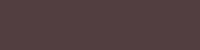

In [ ]:
# Exibe a imagem com as cores médias da pele
Image('mean_skin_colors.jpg',)

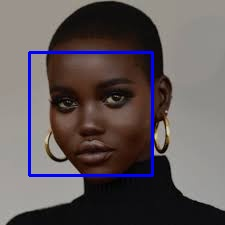

In [ ]:
# Exibe a imagem com os rostos detectados
Image('output_segmented.jpg')

In [ ]:
tabela(mean_color_hex)

'negra'